## RF for Fly ash + Slag

R² Score (Interpolation): -0.0323
MAE (Interpolation): 11.8779
MSE (Interpolation): 202.3515
RMSE (Interpolation): 14.2250
R² Score (Extrapolation): -14.8934
MAE (Extrapolation): 26.1196
MSE (Extrapolation): 788.3415
RMSE (Extrapolation): 28.0774


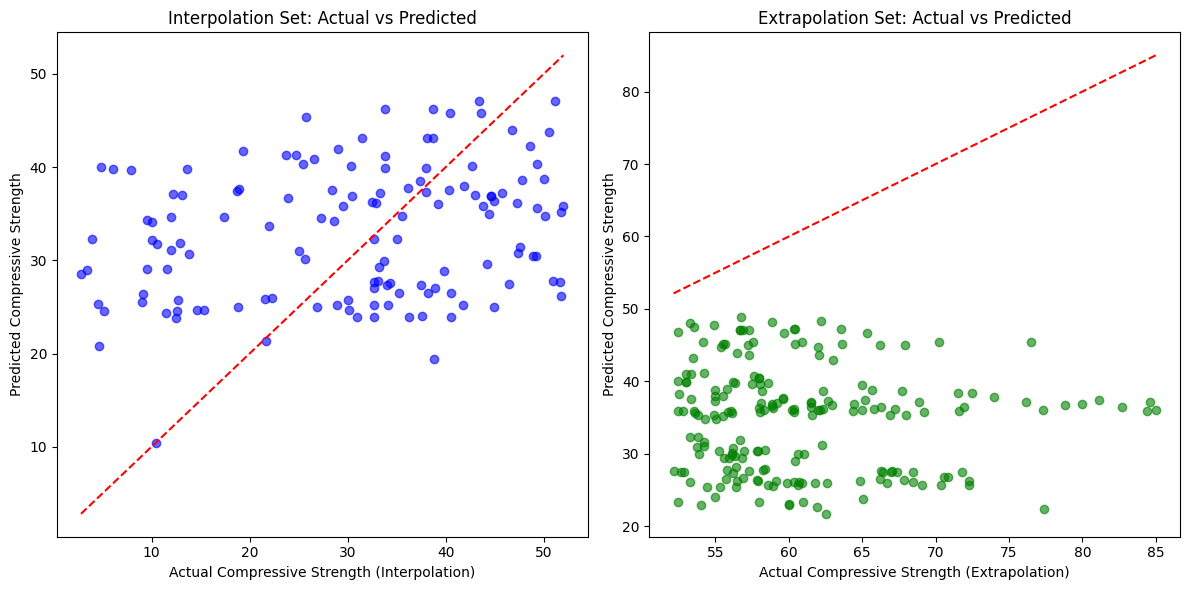

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the previously filtered datasets (assuming these are saved in the same directory)
interp_train_path = '../excel_files/cubic_to_cylinder_intra_extrapolation/filter_based_on_binder/interpolation_train/fly_ash_and_slug_interpolation_train.xlsx'
interp_test_path =  '../excel_files/cubic_to_cylinder_intra_extrapolation/filter_based_on_binder/interpolation_test/fly_ash_and_slug_interpolation_test.xlsx'
extrap_test_path = '../excel_files/cubic_to_cylinder_intra_extrapolation/filter_based_on_binder/extrapolation_test/fly_ash_and_slug_extrapolation_test.xlsx'

df_interp_train = pd.read_excel(interp_train_path)
df_interp_test = pd.read_excel(interp_test_path)
df_extrap_test = pd.read_excel(extrap_test_path)

# Select 10 initial samples randomly from interpolation training set
initial_samples = df_interp_train.sample(n=10, random_state=1)
remaining_interp_train = df_interp_train.drop(initial_samples.index)

# Prepare features and target
features = [
    "SiO2 %",
    "Al2O3 %",
    "Fe2O3 %",
    "CaO %",
    "OPC - content in mix -  (kg/m3)",
    "FA - content in mix -  (kg/m3)",
    "GGBFS - content in mix -  (kg/m3)",
    "SF - content in mix -  (kg/m3)",
    "MK - content in mix -  (kg/m3)",
    "Other SCM - content in mix -  (kg/m3)",
    "Total aggregates - content - (kg/m3)",
    "Water - content from all sources in mix - (kg/m3)",
    "SiO2 - liquid percentage in Na2SiO3 solution - %",
    "SiO2 -Dry content from Na2SiO3 solution in mix - (kg/m3)",
    "NaOH solution - content in mix - (kg/m3)",
    "NaOH solution - concentration - molar",
    "Superplasticizer - content - (kg/m3)",
    "Extra water - content in mix - (kg/m3)",
    "Initial Curing Process - duration - (day)",
    "Initial Curing Process - Temperature - (ºC)",
    "Test age",
]
target = "Compressive test"

# Define features and target for initial sample and test datasets
X_train = initial_samples[features]
y_train = initial_samples[target]
X_interp_test = df_interp_test[features]
y_interp_test = df_interp_test[target]
X_extrap_test = df_extrap_test[features]
y_extrap_test = df_extrap_test[target]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

# Predict on both interpolation and extrapolation test sets
y_interp_pred = rf_model.predict(X_interp_test)
y_extrap_pred = rf_model.predict(X_extrap_test)

# Calculate evaluation metrics
metrics = {
    "R² Score (Interpolation)": r2_score(y_interp_test, y_interp_pred),
    "MAE (Interpolation)": mean_absolute_error(y_interp_test, y_interp_pred),
    "MSE (Interpolation)": mean_squared_error(y_interp_test, y_interp_pred),
    "RMSE (Interpolation)": np.sqrt(mean_squared_error(y_interp_test, y_interp_pred)),
    "R² Score (Extrapolation)": r2_score(y_extrap_test, y_extrap_pred),
    "MAE (Extrapolation)": mean_absolute_error(y_extrap_test, y_extrap_pred),
    "MSE (Extrapolation)": mean_squared_error(y_extrap_test, y_extrap_pred),
    "RMSE (Extrapolation)": np.sqrt(mean_squared_error(y_extrap_test, y_extrap_pred)),
}

# Print the evaluation metrics
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot the predicted vs actual values for both interpolation and extrapolation sets
plt.figure(figsize=(12, 6))

# Interpolation plot
plt.subplot(1, 2, 1)
plt.scatter(y_interp_test, y_interp_pred, color='blue', alpha=0.6)
plt.plot([y_interp_test.min(), y_interp_test.max()], [y_interp_test.min(), y_interp_test.max()], 'r--')
plt.xlabel("Actual Compressive Strength (Interpolation)")
plt.ylabel("Predicted Compressive Strength")
plt.title("Interpolation Set: Actual vs Predicted")

# Extrapolation plot
plt.subplot(1, 2, 2)
plt.scatter(y_extrap_test, y_extrap_pred, color='green', alpha=0.6)
plt.plot([y_extrap_test.min(), y_extrap_test.max()], [y_extrap_test.min(), y_extrap_test.max()], 'r--')
plt.xlabel("Actual Compressive Strength (Extrapolation)")
plt.ylabel("Predicted Compressive Strength")
plt.title("Extrapolation Set: Actual vs Predicted")

plt.tight_layout()
plt.show()


## RF for Only Fly ash

R² Score (Interpolation): 0.0762
MAE (Interpolation): 9.5292
MSE (Interpolation): 134.7214
RMSE (Interpolation): 11.6070
R² Score (Extrapolation): -9.9774
MAE (Extrapolation): 28.4867
MSE (Extrapolation): 886.5369
RMSE (Extrapolation): 29.7748


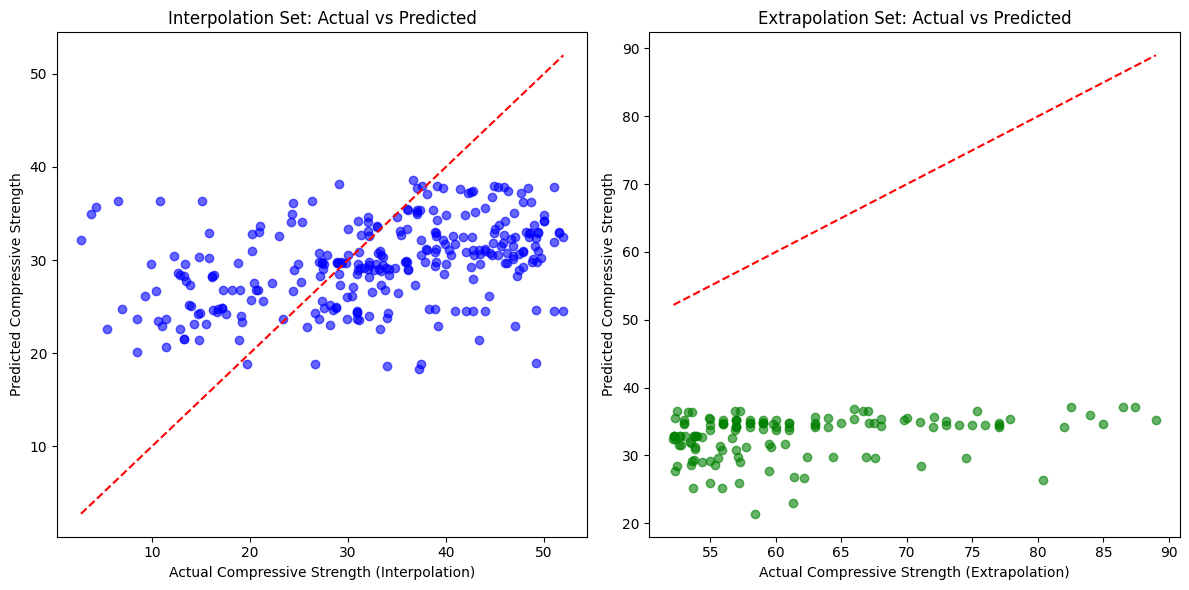

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the previously filtered datasets (assuming these are saved in the same directory)
interp_train_path = '../excel_files/cubic_to_cylinder_intra_extrapolation/filter_based_on_binder/interpolation_train/only_fly_ash_interpolation_train.xlsx'
interp_test_path =  '../excel_files/cubic_to_cylinder_intra_extrapolation/filter_based_on_binder/interpolation_test/only_fly_ash_interpolation_test.xlsx'
extrap_test_path = '../excel_files/cubic_to_cylinder_intra_extrapolation/filter_based_on_binder/extrapolation_test/only_fly_ash_extrapolation_test.xlsx'

df_interp_train = pd.read_excel(interp_train_path)
df_interp_test = pd.read_excel(interp_test_path)
df_extrap_test = pd.read_excel(extrap_test_path)

# Select 10 initial samples randomly from interpolation training set
initial_samples = df_interp_train.sample(n=10, random_state=1)
remaining_interp_train = df_interp_train.drop(initial_samples.index)

# Prepare features and target
features = [
    "SiO2 %",
    "Al2O3 %",
    "Fe2O3 %",
    "CaO %",
    "OPC - content in mix -  (kg/m3)",
    "FA - content in mix -  (kg/m3)",
    "GGBFS - content in mix -  (kg/m3)",
    "SF - content in mix -  (kg/m3)",
    "MK - content in mix -  (kg/m3)",
    "Other SCM - content in mix -  (kg/m3)",
    "Total aggregates - content - (kg/m3)",
    "Water - content from all sources in mix - (kg/m3)",
    "SiO2 - liquid percentage in Na2SiO3 solution - %",
    "SiO2 -Dry content from Na2SiO3 solution in mix - (kg/m3)",
    "NaOH solution - content in mix - (kg/m3)",
    "NaOH solution - concentration - molar",
    "Superplasticizer - content - (kg/m3)",
    "Extra water - content in mix - (kg/m3)",
    "Initial Curing Process - duration - (day)",
    "Initial Curing Process - Temperature - (ºC)",
    "Test age",
]
target = "Compressive test"

# Define features and target for initial sample and test datasets
X_train = initial_samples[features]
y_train = initial_samples[target]
X_interp_test = df_interp_test[features]
y_interp_test = df_interp_test[target]
X_extrap_test = df_extrap_test[features]
y_extrap_test = df_extrap_test[target]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

# Predict on both interpolation and extrapolation test sets
y_interp_pred = rf_model.predict(X_interp_test)
y_extrap_pred = rf_model.predict(X_extrap_test)

# Calculate evaluation metrics
metrics = {
    "R² Score (Interpolation)": r2_score(y_interp_test, y_interp_pred),
    "MAE (Interpolation)": mean_absolute_error(y_interp_test, y_interp_pred),
    "MSE (Interpolation)": mean_squared_error(y_interp_test, y_interp_pred),
    "RMSE (Interpolation)": np.sqrt(mean_squared_error(y_interp_test, y_interp_pred)),
    "R² Score (Extrapolation)": r2_score(y_extrap_test, y_extrap_pred),
    "MAE (Extrapolation)": mean_absolute_error(y_extrap_test, y_extrap_pred),
    "MSE (Extrapolation)": mean_squared_error(y_extrap_test, y_extrap_pred),
    "RMSE (Extrapolation)": np.sqrt(mean_squared_error(y_extrap_test, y_extrap_pred)),
}

# Print the evaluation metrics
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot the predicted vs actual values for both interpolation and extrapolation sets
plt.figure(figsize=(12, 6))

# Interpolation plot
plt.subplot(1, 2, 1)
plt.scatter(y_interp_test, y_interp_pred, color='blue', alpha=0.6)
plt.plot([y_interp_test.min(), y_interp_test.max()], [y_interp_test.min(), y_interp_test.max()], 'r--')
plt.xlabel("Actual Compressive Strength (Interpolation)")
plt.ylabel("Predicted Compressive Strength")
plt.title("Interpolation Set: Actual vs Predicted")

# Extrapolation plot
plt.subplot(1, 2, 2)
plt.scatter(y_extrap_test, y_extrap_pred, color='green', alpha=0.6)
plt.plot([y_extrap_test.min(), y_extrap_test.max()], [y_extrap_test.min(), y_extrap_test.max()], 'r--')
plt.xlabel("Actual Compressive Strength (Extrapolation)")
plt.ylabel("Predicted Compressive Strength")
plt.title("Extrapolation Set: Actual vs Predicted")

plt.tight_layout()
plt.show()


## RF for only Slag

R² Score (Interpolation): 0.2671
MAE (Interpolation): 6.2927
MSE (Interpolation): 55.5031
RMSE (Interpolation): 7.4500
R² Score (Extrapolation): -8.9375
MAE (Extrapolation): 22.7113
MSE (Extrapolation): 605.3084
RMSE (Extrapolation): 24.6030


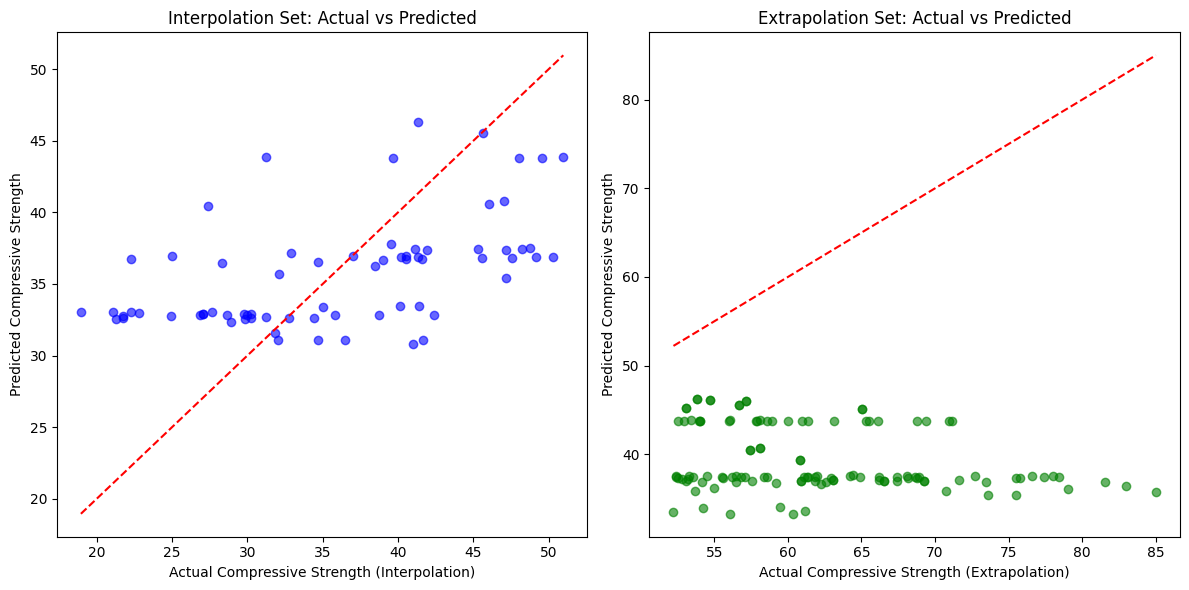

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the previously filtered datasets (assuming these are saved in the same directory)
interp_train_path = '../excel_files/cubic_to_cylinder_intra_extrapolation/filter_based_on_binder/interpolation_train/only_slag_interpolation_train.xlsx'
interp_test_path =  '../excel_files/cubic_to_cylinder_intra_extrapolation/filter_based_on_binder/interpolation_test/only_slag_interpolation_test.xlsx'
extrap_test_path = '../excel_files/cubic_to_cylinder_intra_extrapolation/filter_based_on_binder/extrapolation_test/only_slag_extrapolation_test.xlsx'

df_interp_train = pd.read_excel(interp_train_path)
df_interp_test = pd.read_excel(interp_test_path)
df_extrap_test = pd.read_excel(extrap_test_path)

# Select 10 initial samples randomly from interpolation training set
initial_samples = df_interp_train.sample(n=10, random_state=1)
remaining_interp_train = df_interp_train.drop(initial_samples.index)

# Prepare features and target
features = [
    "SiO2 %",
    "Al2O3 %",
    "Fe2O3 %",
    "CaO %",
    "OPC - content in mix -  (kg/m3)",
    "FA - content in mix -  (kg/m3)",
    "GGBFS - content in mix -  (kg/m3)",
    "SF - content in mix -  (kg/m3)",
    "MK - content in mix -  (kg/m3)",
    "Other SCM - content in mix -  (kg/m3)",
    "Total aggregates - content - (kg/m3)",
    "Water - content from all sources in mix - (kg/m3)",
    "SiO2 - liquid percentage in Na2SiO3 solution - %",
    "SiO2 -Dry content from Na2SiO3 solution in mix - (kg/m3)",
    "NaOH solution - content in mix - (kg/m3)",
    "NaOH solution - concentration - molar",
    "Superplasticizer - content - (kg/m3)",
    "Extra water - content in mix - (kg/m3)",
    "Initial Curing Process - duration - (day)",
    "Initial Curing Process - Temperature - (ºC)",
    "Test age",
]
target = "Compressive test"

# Define features and target for initial sample and test datasets
X_train = initial_samples[features]
y_train = initial_samples[target]
X_interp_test = df_interp_test[features]
y_interp_test = df_interp_test[target]
X_extrap_test = df_extrap_test[features]
y_extrap_test = df_extrap_test[target]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

# Predict on both interpolation and extrapolation test sets
y_interp_pred = rf_model.predict(X_interp_test)
y_extrap_pred = rf_model.predict(X_extrap_test)

# Calculate evaluation metrics
metrics = {
    "R² Score (Interpolation)": r2_score(y_interp_test, y_interp_pred),
    "MAE (Interpolation)": mean_absolute_error(y_interp_test, y_interp_pred),
    "MSE (Interpolation)": mean_squared_error(y_interp_test, y_interp_pred),
    "RMSE (Interpolation)": np.sqrt(mean_squared_error(y_interp_test, y_interp_pred)),
    "R² Score (Extrapolation)": r2_score(y_extrap_test, y_extrap_pred),
    "MAE (Extrapolation)": mean_absolute_error(y_extrap_test, y_extrap_pred),
    "MSE (Extrapolation)": mean_squared_error(y_extrap_test, y_extrap_pred),
    "RMSE (Extrapolation)": np.sqrt(mean_squared_error(y_extrap_test, y_extrap_pred)),
}

# Print the evaluation metrics
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot the predicted vs actual values for both interpolation and extrapolation sets
plt.figure(figsize=(12, 6))

# Interpolation plot
plt.subplot(1, 2, 1)
plt.scatter(y_interp_test, y_interp_pred, color='blue', alpha=0.6)
plt.plot([y_interp_test.min(), y_interp_test.max()], [y_interp_test.min(), y_interp_test.max()], 'r--')
plt.xlabel("Actual Compressive Strength (Interpolation)")
plt.ylabel("Predicted Compressive Strength")
plt.title("Interpolation Set: Actual vs Predicted")

# Extrapolation plot
plt.subplot(1, 2, 2)
plt.scatter(y_extrap_test, y_extrap_pred, color='green', alpha=0.6)
plt.plot([y_extrap_test.min(), y_extrap_test.max()], [y_extrap_test.min(), y_extrap_test.max()], 'r--')
plt.xlabel("Actual Compressive Strength (Extrapolation)")
plt.ylabel("Predicted Compressive Strength")
plt.title("Extrapolation Set: Actual vs Predicted")

plt.tight_layout()
plt.show()
